In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jdatetime


In [3]:
divarDf = pd.read_csv("Divar.csv")

In [4]:
print("divarDf.columns : ",divarDf.columns)
print("divarDf.index : ",divarDf.index)

divarDf.columns :  Index(['Unnamed: 0', 'cat2_slug', 'cat3_slug', 'city_slug',
       'neighborhood_slug', 'created_at_month', 'user_type', 'description',
       'title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',
       'land_size', 'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony',
       'has_elevator', 'has_warehouse', 'has_parking', 'construction_year',
       'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
       'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'regula

In [5]:
divarDf.memory_usage(deep=True).sum() / (1024**2) #MB

np.float64(2464.2238025665283)

In [6]:
divarDf.values.nbytes

488000000

In [7]:
print("divarDf.shape : ",divarDf.shape)
print("divarDf.info() : ",divarDf.info())

divarDf.shape :  (1000000, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                 

In [8]:
divarDf.head(2)

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.9366,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0


<h3><b>Step 1: Dropping the 'Unnamed: 0' Column</b></h3>

In [9]:
# Drop the 'Unnamed: 0' column
divarDf_dropUnnamed = divarDf.copy()
divarDf_dropUnnamed.drop('Unnamed: 0', axis=1 , inplace=True)

print("divarDf_dropUnnamed.columns after dropping 'Unnamed: 0':")
print(divarDf_dropUnnamed.columns)

divarDf_dropUnnamed.columns after dropping 'Unnamed: 0':
Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'user_type', 'description', 'title', 'rent_mode',
       'rent_value', 'rent_to_single', 'rent_type', 'price_mode',
       'price_value', 'credit_mode', 'credit_value', 'rent_credit_transform',
       'transformable_price', 'transformable_credit', 'transformed_credit',
       'transformable_rent', 'transformed_rent', 'land_size', 'building_size',
       'deed_type', 'has_business_deed', 'floor', 'rooms_count',
       'total_floors_count', 'unit_per_floor', 'has_balcony', 'has_elevator',
       'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt',
       'has_water', 'has_warm_water_provider', 'has_electricity', 'has_gas',
       'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'proper

<h3 dir="rtl"><b>تحلیل درصد مقادیر گمشده</b></h3>
<p dir="rtl">خروجی ارائه شده، دیدگاهی جامع از داده‌های گمشده در تمامی ستون‌های دیتافریم <code>divarDf_dropUnnamed</code> را به صورت درصد از کل ردیف‌ها ارائه می‌دهد. درک این درصدها برای تعیین استراتژی‌های مناسب تکمیل (Imputation) یا حذف داده‌ها بسیار حیاتی است، که مستقیماً بر کیفیت تحلیل‌های آماری و مدل‌های یادگیری ماشین آتی تأثیر می‌گذارد.</p>



In [10]:
missing_percentage = divarDf_dropUnnamed.isna().sum() / len(divarDf_dropUnnamed) * 100
missing_percentage
# missing_ratio = divarDf_dropUnnamed.isna().sum().mean()

cat2_slug                      0.0000
cat3_slug                      0.0001
city_slug                      0.0002
neighborhood_slug             56.2861
created_at_month               0.0000
user_type                     71.1118
description                    0.0000
title                          0.0054
rent_mode                     64.7006
rent_value                    64.8678
rent_to_single                99.9981
rent_type                     89.6039
price_mode                    42.6394
price_value                   43.1654
credit_mode                   64.7006
credit_value                  64.7905
rent_credit_transform         64.7015
transformable_price           64.7106
transformable_credit          64.7915
transformed_credit            92.7591
transformable_rent            64.8752
transformed_rent              92.7591
land_size                     81.3604
building_size                  1.9606
deed_type                     74.6542
has_business_deed             96.5321
floor       

<h4 dir="rtl">مشاهدات کلیدی:</h4>
<ul dir="rtl">
    <li><b>درصد بسیار بالای داده‌های گمشده (بیش از 90%):</b>
        <ul dir="rtl">
            <li><code>rent_to_single</code> (99.9981%): این ستون تقریباً کاملاً خالی است و کارایی محدودی دارد و باید حذف شود.</li>
            <li><code>transformed_credit</code> (92.7591%), <code>transformed_rent</code> (92.7591%), <code>has_business_deed</code> (96.5321%), <code>has_water</code> (96.6556%), <code>has_electricity</code> (96.6555%), <code>has_gas</code> (96.6570%), <code>has_security_guard</code> (96.8688%), <code>has_barbecue</code> (96.8802%), <code>has_pool</code> (97.0610%), <code>has_jacuzzi</code> (97.1272%), <code>has_sauna</code> (97.1521%), <code>property_type</code> (97.2943%), <code>regular_person_capacity</code> (97.0130%), <code>extra_person_capacity</code> (97.5991%), <code>cost_per_extra_person</code> (98.9759%), <code>rent_price_on_regular_days</code> (98.1932%), <code>rent_price_on_special_days</code> (98.9537%), <code>rent_price_at_weekends</code> (98.6449%), <code>rent_type</code> (89.6039%).</li>
            <li>بسیاری از این ستون‌ها (مانند امکانات رفاهی، اطلاعات اجاره روزانه/هفتگی، سند تجاری) احتمالاً به دلیل اینکه فقط برای بخش بسیار کوچکی از املاک قابل استفاده هستند یا اطلاعات به طور معمول ارائه نمی‌شود، دارای داده‌های پراکنده هستند. در حالی که ستون‌های بسیار پراکنده ممکن است کاندیدای حذف باشند، برخی (مانند <code>transformed_credit</code> و <code>transformed_rent</code>) برای وظیفه پیش‌بینی قیمت حیاتی هستند و نیاز به رسیدگی تخصصی دارند، زیرا گمشده بودن آنها نشان دهنده این است که ملک برای فروش است نه اجاره.</li>
        </ul>
    </li>
    <li><b>درصد قابل توجه داده‌های گمشده (بین 40% تا 90%):</b>
        <ul dir="rtl">
            <li><code>neighborhood_slug</code> (56.2861%), <code>user_type</code> (71.1118%), <code>rent_mode</code> (64.7006%), <code>rent_value</code> (64.8678%), <code>price_mode</code> (42.6394%), <code>price_value</code> (43.1654%), <code>credit_mode</code> (64.7006%), <code>credit_value</code> (64.7905%), <code>rent_credit_transform</code> (64.7015%), <code>transformable_price</code> (64.7106%), <code>transformable_credit</code> (64.7915%), <code>land_size</code> (81.3604%), <code>deed_type</code> (74.6542%), <code>floor</code> (45.8252%), <code>total_floors_count</code> (69.5648%), <code>unit_per_floor</code> (69.7717%), <code>has_balcony</code> (49.3589%), <code>has_elevator</code> (45.8251%), <code>has_warm_water_provider</code> (62.0500%), <code>has_heating_system</code> (63.1031%), <code>has_cooling_system</code> (64.9381%), <code>has_restroom</code> (59.3087%), <code>building_direction</code> (67.6077%), <code>floor_material</code> (59.4016%), <code>location_radius</code> (66.0301%).</li>
            <li>این گروه یک چالش بزرگ را نشان می‌دهد. بسیاری از این موارد به جزئیات اجاره/فروش مربوط می‌شوند، که اغلب به این معنی است که اگر ملکی برای فروش باشد، مقادیر مربوط به اجاره آن گمشده خواهند بود و بالعکس. این امر مستلزم یک رویکرد استراتژیک برای تکمیل داده‌ها (Imputation) است، که احتمالاً با پر کردن '0' یا 'غیر قابل استفاده' و شاید ایجاد ویژگی‌های نشانگر (indicator features) همراه باشد. برای ستون‌های طبقه‌بندی شده مانند <code>neighborhood_slug</code> یا <code>user_type</code>، تکمیل با یک دسته جدید مانند 'ناشناخته' یا 'گمشده' یک استراتژی رایج است.</li>
        </ul>
    </li>
    <li><b>درصد متوسط داده‌های گمشده (کمتر از 20%):</b>
        <ul dir="rtl">
            <li><code>building_size</code> (1.9606%), <code>rooms_count</code> (15.4101%), <code>construction_year</code> (18.4172%), <code>location_latitude</code> (34.4392%), <code>location_longitude</code> (34.4392%).</li>
            <li>این ستون‌ها مقدار قابل کنترلی از داده‌های گمشده دارند. برای ویژگی‌های عددی مانند <code>building_size</code>، <code>rooms_count</code> و <code>construction_year</code>، تکمیل با میانه یا میانگین (بسته به توزیع) گزینه مناسبی است. برای مختصات جغرافیایی، تکمیل ساده ممکن است کمتر مؤثر باشد؛ با این حال، با توجه به تأکید پروژه بر تحلیل فضایی، این موارد نیاز به توجه دقیق دارند.</li>
        </ul>
    </li>
    <li><b>درصد ناچیز داده‌های گمشده (کمتر از 0.1%):</b>
        <ul dir="rtl">
            <li><code>cat2_slug</code>, <code>cat3_slug</code>, <code>city_slug</code>, <code>created_at_month</code>, <code>description</code>, <code>title</code>.</li>
            <li>این ستون‌ها تقریباً کامل هستند و نیاز به حداقل رسیدگی به مقادیر گمشده دارند.</li>
        </ul>
    </li>
</ul>

In [11]:
columns_to_drop = missing_percentage[missing_percentage > 99.9].index.tolist()
print("columns_to_drop : ",columns_to_drop)


columns_to_drop :  ['rent_to_single']


In [12]:
has_columns_to_drop = missing_percentage[missing_percentage > 90].index
print("has_columns_to_drop : ",has_columns_to_drop[has_columns_to_drop.str.startswith("has_")])

has_columns_to_drop :  Index(['has_business_deed', 'has_water', 'has_electricity', 'has_gas',
       'has_security_guard', 'has_barbecue', 'has_pool', 'has_jacuzzi',
       'has_sauna'],
      dtype='object')


<p>
Based on the project documentation, the following columns are not used in any analysis and should be removed:
</p>
<ul>
  <li><code>has_water</code></li>
  <li><code>has_electricity</code></li>
  <li><code>has_gas</code></li>
  <li><code>rent_to_single</code></li>
</ul>


In [13]:
divarDf_cleaned = divarDf_dropUnnamed.drop(columns=columns_to_drop + ["has_gas","has_water","has_electricity"])

In [14]:


has_columns = divarDf_cleaned.filter(like="has_").columns

for col in has_columns:
    # print(f"missing_percentage : {missing_percentage[col]}")
    print(divarDf_cleaned[col].value_counts(normalize=True),"\n")


has_business_deed
False    0.502552
True     0.497448
Name: proportion, dtype: float64 

has_balcony
true        0.774264
false       0.175460
True        0.040860
False       0.008975
unselect    0.000440
Name: proportion, dtype: float64 

has_elevator
True     0.674017
False    0.325983
Name: proportion, dtype: float64 

has_warehouse
True     0.79971
False    0.20029
Name: proportion, dtype: float64 

has_parking
True     0.758824
False    0.241176
Name: proportion, dtype: float64 

has_warm_water_provider
package         0.541874
water_heater    0.371758
powerhouse      0.082727
unselect        0.003642
Name: proportion, dtype: float64 

has_heating_system
shoofaj          0.545726
heater           0.324610
duct_split       0.059753
floor_heating    0.020915
split            0.015841
fan_coil         0.013727
fireplace        0.010977
unselect         0.008451
Name: proportion, dtype: float64 

has_cooling_system
water_cooler       0.625368
air_conditioner    0.149282
split        

In [15]:

std_map = {
    'true': True,
    'false': False,
    'True': True,
    'False': False,
    'unselect': np.nan
}
divarDf_cleaned[has_columns] = divarDf_cleaned[has_columns].replace(std_map)
for col in has_columns:
    print(divarDf_cleaned[col].value_counts(normalize=True),"\n")

has_business_deed
False    0.502552
True     0.497448
Name: proportion, dtype: float64 

has_balcony
True     0.815484
False    0.184516
Name: proportion, dtype: float64 

has_elevator
True     0.674017
False    0.325983
Name: proportion, dtype: float64 

has_warehouse
True     0.79971
False    0.20029
Name: proportion, dtype: float64 

has_parking
True     0.758824
False    0.241176
Name: proportion, dtype: float64 

has_warm_water_provider
package         0.543854
water_heater    0.373116
powerhouse      0.083030
Name: proportion, dtype: float64 

has_heating_system
shoofaj          0.550377
heater           0.327376
duct_split       0.060262
floor_heating    0.021093
split            0.015976
fan_coil         0.013844
fireplace        0.011070
Name: proportion, dtype: float64 

has_cooling_system
water_cooler       0.636103
air_conditioner    0.151844
split              0.112294
duct_split         0.085213
fan_coil           0.014546
Name: proportion, dtype: float64 

has_restroom
s

In [16]:
"""
has_business_deed, has_balcony, has_elevator, has_warehouse, has_parking, has_security_guard, 
has_barbecue, has_pool, has_jacuzzi, has_sauna -> boolean Type

has_warm_water_provider, has_heating_system, has_cooling_system, has_restroom -> categorical Type

"""
boolean_col = [
    "has_business_deed", "has_balcony", "has_elevator", "has_warehouse", "has_parking",
      "has_security_guard", "has_barbecue", "has_pool", "has_jacuzzi", "has_sauna"

]

# divarDf_cleaned[boolean_col] = divarDf_cleaned[boolean_col].astype(bool)
# for col in has_columns:
#     missing_ratio = divarDf_cleaned[col].isna().mean()
#     if missing_ratio > 0.3:
#         mode_val = divarDf_cleaned[col].mode(dropna=True)
#         print(col)
#         print(mode_val)
#         if not mode_val.empty:
#             divarDf_cleaned[col] = divarDf_cleaned[col].fillna(mode_val[0]).infer_objects()


In [17]:
row_missing_percentage = divarDf_cleaned.isna().sum(axis=1) / len(divarDf_cleaned.columns) * 100
row_missing_percentage

0         66.071429
1         67.857143
2         55.357143
3         60.714286
4         53.571429
            ...    
999995    66.071429
999996    48.214286
999997    73.214286
999998    76.785714
999999    32.142857
Length: 1000000, dtype: float64

In [18]:
# print(len(divarDf_cleaned))
# divarDf_cleaned = divarDf_cleaned[row_missing_percentage < 60]
# print(len(divarDf_cleaned))

In [19]:
divarDf_cleaned[has_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   has_business_deed        34679 non-null   object
 1   has_balcony              506188 non-null  object
 2   has_elevator             541749 non-null  object
 3   has_warehouse            728155 non-null  object
 4   has_parking              728156 non-null  object
 5   has_warm_water_provider  378118 non-null  object
 6   has_heating_system       365851 non-null  object
 7   has_cooling_system       344702 non-null  object
 8   has_restroom             406285 non-null  object
 9   has_security_guard       31312 non-null   object
 10  has_barbecue             31198 non-null   object
 11  has_pool                 29390 non-null   object
 12  has_jacuzzi              28728 non-null   object
 13  has_sauna                28479 non-null   object
dtypes: object(14)
memor

In [20]:
cols_to_convert = [
    'rooms_count', 'floor', 'total_floors_count',
    'unit_per_floor', 'construction_year'
]
divarDf_cleaned[cols_to_convert].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   rooms_count         845899 non-null  object
 1   floor               541748 non-null  object
 2   total_floors_count  304352 non-null  object
 3   unit_per_floor      302283 non-null  object
 4   construction_year   815828 non-null  object
dtypes: object(5)
memory usage: 38.1+ MB


In [21]:
divarDf_cleaned[cols_to_convert].isna().mean()

rooms_count           0.154101
floor                 0.458252
total_floors_count    0.695648
unit_per_floor        0.697717
construction_year     0.184172
dtype: float64

In [22]:
for col in cols_to_convert:
    print(col,divarDf_cleaned[col].unique())

rooms_count ['سه' 'یک' 'دو' 'بدون اتاق' nan 'چهار' 'پنج یا بیشتر']
floor [nan '3' '4' '2' '1' '5' '0' '30' '6' '7' '8' '18' '12' '11' '10' '-1'
 '13' '9' '19' '16' '30+' '21' '15' '22' '14' '17' '20' '23' '25' '24'
 '26' '28' '29' '27' 3.0 2.0 4.0 1.0 0.0 20.0 5.0 7.0 6.0 18.0 8.0 -1.0
 22.0 10.0 14.0 9.0 11.0]
total_floors_count [nan '6' '3' '14' '5' '4' '2' '7' '8' '10' '11' '12' '17' '9' '25' '18'
 '19' '15' '16' '21' '20' '22' '13' '24' '30+' '29' '26' '30' 'unselect'
 '27' '23' '28' 4.0 5.0 6.0 2.0 3.0 14.0 25.0 8.0 7.0 20.0 11.0 10.0 12.0
 13.0 21.0 19.0]
unit_per_floor [nan '2' '4' '1' '3' '5' '6' '8' 'more_than_8' '7' 'unselect']
construction_year [nan '۱۳۸۴' '۱۴۰۱' '۱۴۰۰' '۱۴۰۳' '۱۳۸۹' '۱۳۹۵' '۱۳۹۳' '۱۳۹۶' '۱۳۸۷' '۱۳۸۵'
 '۱۳۹۰' '۱۳۹۸' '۱۴۰۲' '۱۳۸۸' 'قبل از ۱۳۷۰' '۱۳۹۲' '۱۳۸۳' '۱۳۹۴' '۱۳۹۱'
 '۱۳۸۰' '۱۳۷۸' '۱۳۷۵' '۱۳۹۷' '۱۳۹۹' '۱۳۸۲' '۱۳۸۶' '۱۳۷۹' '۱۳۷۲' '۱۳۷۴'
 '۱۳۷۶' '۱۳۷۷' '۱۳۷۱' '۱۳۸۱' '۱۳۷۳']


In [23]:
def persian_to_english(s):
    if pd.isnull(s):
        return s
    mapping = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")
    return str(s).translate(mapping)

# Apply to 'construction_year'
divarDf_cleaned["construction_year"] = divarDf_cleaned["construction_year"].replace("قبل از ۱۳۷۰", "۱۳۶۹")
divarDf_cleaned["construction_year"] = divarDf_cleaned["construction_year"].apply(persian_to_english)

# Convert to numeric
divarDf_cleaned["construction_year"] = pd.to_numeric(divarDf_cleaned["construction_year"], errors="coerce")

divarDf_cleaned["construction_year"].unique()


array([  nan, 1384., 1401., 1400., 1403., 1389., 1395., 1393., 1396.,
       1387., 1385., 1390., 1398., 1402., 1388., 1369., 1392., 1383.,
       1394., 1391., 1380., 1378., 1375., 1397., 1399., 1382., 1386.,
       1379., 1372., 1374., 1376., 1377., 1371., 1381., 1373.])

In [24]:
transformDic ={"بدون اتاق":0,"یک":1,"دو":2,"سه":3,"چهار":4,"پنج یا بیشتر":5}
divarDf_cleaned["rooms_count"] = divarDf_cleaned["rooms_count"].replace(transformDic)

In [25]:
divarDf_cleaned["created_at_month"] = pd.to_datetime(divarDf_cleaned["created_at_month"])
divarDf_cleaned["created_at_month"].unique()


<DatetimeArray>
['2024-08-01 00:00:00', '2024-05-01 00:00:00', '2024-10-01 00:00:00',
 '2024-06-01 00:00:00', '2024-09-01 00:00:00', '2024-11-01 00:00:00',
 '2024-07-01 00:00:00', '2024-12-01 00:00:00', '2024-04-01 00:00:00',
 '2025-01-01 00:00:00', '2024-03-01 00:00:00', '2024-01-01 00:00:00',
 '2025-02-01 00:00:00', '2024-02-01 00:00:00', '2023-11-01 00:00:00',
 '2023-09-01 00:00:00', '2023-10-01 00:00:00', '2023-07-01 00:00:00',
 '2023-12-01 00:00:00', '2023-05-01 00:00:00', '2023-03-01 00:00:00',
 '2023-04-01 00:00:00', '2023-06-01 00:00:00', '2023-08-01 00:00:00',
 '2023-02-01 00:00:00', '2021-05-01 00:00:00', '2022-11-01 00:00:00',
 '2022-07-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2023-01-01 00:00:00', '2022-10-01 00:00:00', '2021-12-01 00:00:00',
 '2020-12-01 00:00:00', '2022-12-01 00:00:00', '2022-04-01 00:00:00',
 '2022-09-01 00:00:00', '2022-08-01 00:00:00', '2021-06-01 00:00:00',
 '2022-02-01 00:00:00', '2020-02-01 00:00:00', '2022-01-01 00:00:00',
 '20

In [26]:
divarDf_cleaned.convert_dtypes()
divarDf_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 56 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   cat2_slug                   1000000 non-null  object        
 1   cat3_slug                   999999 non-null   object        
 2   city_slug                   999998 non-null   object        
 3   neighborhood_slug           437139 non-null   object        
 4   created_at_month            1000000 non-null  datetime64[ns]
 5   user_type                   288882 non-null   object        
 6   description                 1000000 non-null  object        
 7   title                       999946 non-null   object        
 8   rent_mode                   352994 non-null   object        
 9   rent_value                  351322 non-null   float64       
 10  rent_type                   103961 non-null   object        
 11  price_mode               

In [27]:
divarDf_cleaned[divarDf_cleaned.credit_mode.notna()][["regular_person_capacity","extra_person_capacity","rooms_count"]].isna().mean()


regular_person_capacity    1.000000
extra_person_capacity      1.000000
rooms_count                0.001057
dtype: float64

In [28]:
divarDf_cleaned.extra_person_capacity.unique()

array(['6', nan, '7', '2', '1', '0', '4', '3', '10', '8', '15', '25', '5',
       '30+', '29', '11', '12', '20', '14', '28', '18', '13', '9', '19',
       '17', '24', '27', '21', '23', '16', '26', '22', 4.0, 5.0, 1.0, 2.0,
       6.0], dtype=object)

In [29]:
divarDf_cleaned.cat2_slug.unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [30]:
divarDf_cleaned.cat3_slug.unique()

array(['villa', 'apartment-sell', 'apartment-rent', 'office-rent',
       'shop-sell', 'plot-old', 'house-villa-sell', 'house-villa-rent',
       'shop-rent', 'industry-agriculture-business-rent', 'office-sell',
       'industry-agriculture-business-sell', 'presell', 'suite-apartment',
       'partnership', 'workspace', nan], dtype=object)

In [31]:
divarDf_cleaned.to_csv("Divar_clean.csv",index=False)

In [32]:
def to_shamsi_year(gdate):
    if pd.isnull(gdate):
        return None
    jdate = jdatetime.date.fromgregorian(date=gdate)
    return jdate.year

divarDf_shamsi = divarDf_cleaned.copy()
divarDf_shamsi["shamsi_year"] = divarDf_shamsi["created_at_month"].apply(to_shamsi_year)
price_df = divarDf_shamsi[
    divarDf_shamsi["shamsi_year"].isin([1400, 1401, 1402, 1403]) & 
    divarDf_shamsi["price_value"].notna()
]
price_df.head(2)

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,shamsi_year
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,1403
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1403


In [33]:
avg_price_by_year = price_df.groupby("shamsi_year")["price_value"].mean()
print(avg_price_by_year)
avg_price_by_year = avg_price_by_year.reset_index() # Generate a new DataFrame or Series with the index reset.
avg_price_by_year.columns = ["year", "nominal_price"]
avg_price_by_year

shamsi_year
1400    1.066667e+09
1401    1.882049e+10
1402    7.918916e+09
1403    1.743388e+10
Name: price_value, dtype: float64


,year,nominal_price
0,1400,1.066667e+09
1,1401,1.882049e+10
2,1402,7.918916e+09
3,1403,1.743388e+10


In [34]:
base_year = 1400
base_price = avg_price_by_year.loc[avg_price_by_year["year"] == base_year, "nominal_price"].values[0]
avg_price_by_year["inflation_index"] = avg_price_by_year["nominal_price"] / base_price
avg_price_by_year["real_price"] = avg_price_by_year["nominal_price"] / avg_price_by_year["inflation_index"]
avg_price_by_year["nominal_price"] = avg_price_by_year["nominal_price"] / 1e9
avg_price_by_year["real_price"] = avg_price_by_year["real_price"] / 1e9
print(avg_price_by_year)

   year  nominal_price  inflation_index  real_price
0  1400       1.066667         1.000000    1.066667
1  1401      18.820486        17.644206    1.066667
2  1402       7.918916         7.423984    1.066667
3  1403      17.433879        16.344261    1.066667


   year     price_type      price
0  1400  nominal_price   1.066667
1  1401  nominal_price  18.820486
2  1402  nominal_price   7.918916
3  1403  nominal_price  17.433879
4  1400     real_price   1.066667
5  1401     real_price   1.066667
6  1402     real_price   1.066667
7  1403     real_price   1.066667


Text(0, 0.5, 'Price (\u200cBillion Toman)')

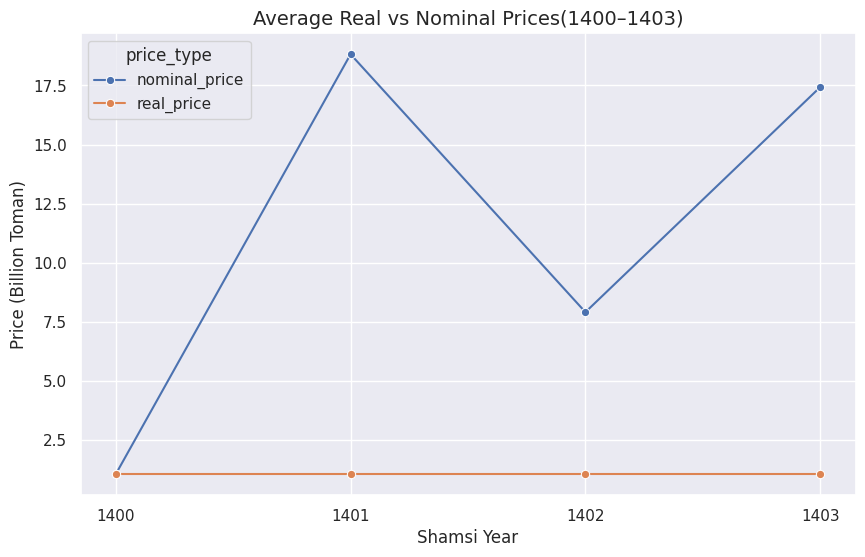

In [35]:


plot_df = avg_price_by_year.melt(
    id_vars="year",
    value_vars=["nominal_price", "real_price"],
    var_name="price_type",
    value_name="price"
)
print(plot_df)
# Plot
# print(plt.style.available)
sns.set_theme()
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=plot_df, x="year", y="price", hue="price_type", marker="o",ax=ax)
ax.set_xticks([1400, 1401, 1402, 1403])
ax.set_title("Average Real vs Nominal Prices(1400–1403)", fontsize=14)
ax.set_xlabel("Shamsi Year")
ax.set_ylabel("Price (‌Billion Toman)")


In [36]:
cols = [
    "price_value", "land_size", "building_size",
    "regular_person_capacity", "rooms_count",
    "location_latitude", "location_longitude"
]

corr_matrix = divarDf_shamsi[cols].copy()
print(corr_matrix.isna().mean())
print(corr_matrix.dropna())


price_value                0.431654
land_size                  0.813604
building_size              0.019606
regular_person_capacity    0.970130
rooms_count                0.154101
location_latitude          0.344392
location_longitude         0.344392
dtype: float64
Empty DataFrame
Columns: [price_value, land_size, building_size, regular_person_capacity, rooms_count, location_latitude, location_longitude]
Index: []


<Axes: >

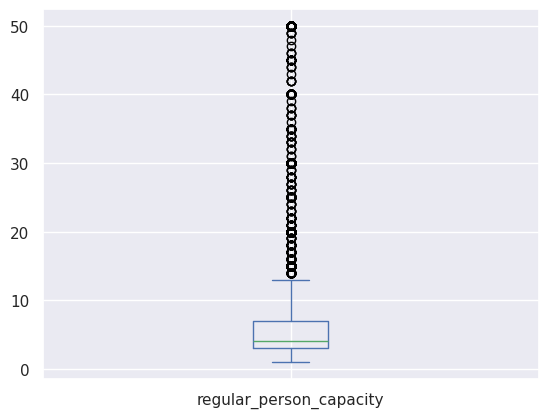

In [37]:
corr_matrix.regular_person_capacity.plot(kind="box")

Text(0.5, 1.0, 'correlation heatmap')

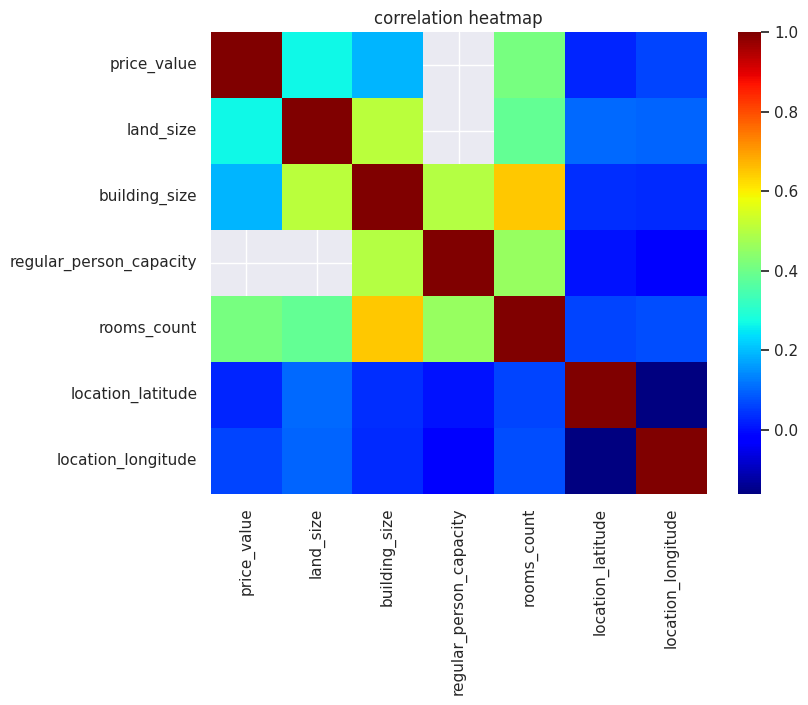

In [38]:
fig1, ax1 = plt.subplots(figsize=(8,6)) # To-Do
sns.heatmap(data=corr_matrix.corr("spearman"),ax=ax1,cmap="jet")
ax1.set_title("correlation heatmap")

In [39]:
df_process = pd.read_csv("Divar_processed.csv")

In [40]:
divarDf_cleaned.isna().mean()

cat2_slug                     0.000000
cat3_slug                     0.000001
city_slug                     0.000002
neighborhood_slug             0.562861
created_at_month              0.000000
user_type                     0.711118
description                   0.000000
title                         0.000054
rent_mode                     0.647006
rent_value                    0.648678
rent_type                     0.896039
price_mode                    0.426394
price_value                   0.431654
credit_mode                   0.647006
credit_value                  0.647905
rent_credit_transform         0.647015
transformable_price           0.647106
transformable_credit          0.647915
transformed_credit            0.927591
transformable_rent            0.648752
transformed_rent              0.927591
land_size                     0.813604
building_size                 0.019606
deed_type                     0.746542
has_business_deed             0.965321
floor                    

In [41]:
amenity_cols = ['has_balcony', 'has_elevator', 'has_security_guard', 'has_barbecue', 'has_pool']
divarDf_amenity = divarDf_cleaned.copy()
divarDf_amenity[amenity_cols] = divarDf_amenity[amenity_cols].fillna(False)

In [42]:
amenity_names = {
    'has_balcony': 'Balcony',
    'has_elevator': 'Elevator', 
    'has_security_guard': 'SecGaurd',
    'has_barbecue': 'Barbecue',
    'has_pool': 'Pool'
}

In [43]:
divarDf_amenity['total_amenities'] = 0
for col in amenity_cols:
        divarDf_amenity['total_amenities'] += divarDf_amenity[col].astype(int)

In [44]:
city_amenities = divarDf_amenity.groupby('city_slug').agg({
    'has_balcony': 'sum',
    'has_elevator': 'sum', 
    'has_security_guard': 'sum',
    'has_barbecue': 'sum',
    'has_pool': 'sum',
    'city_slug': 'count'
}).rename(columns={'city_slug': 'total_properties'})


In [45]:
for col in amenity_cols:
        city_amenities[f'{col}_pct'] = (city_amenities[col] / city_amenities['total_properties']) * 100

In [46]:
city_amenities = city_amenities.sort_values('total_properties', ascending=False)

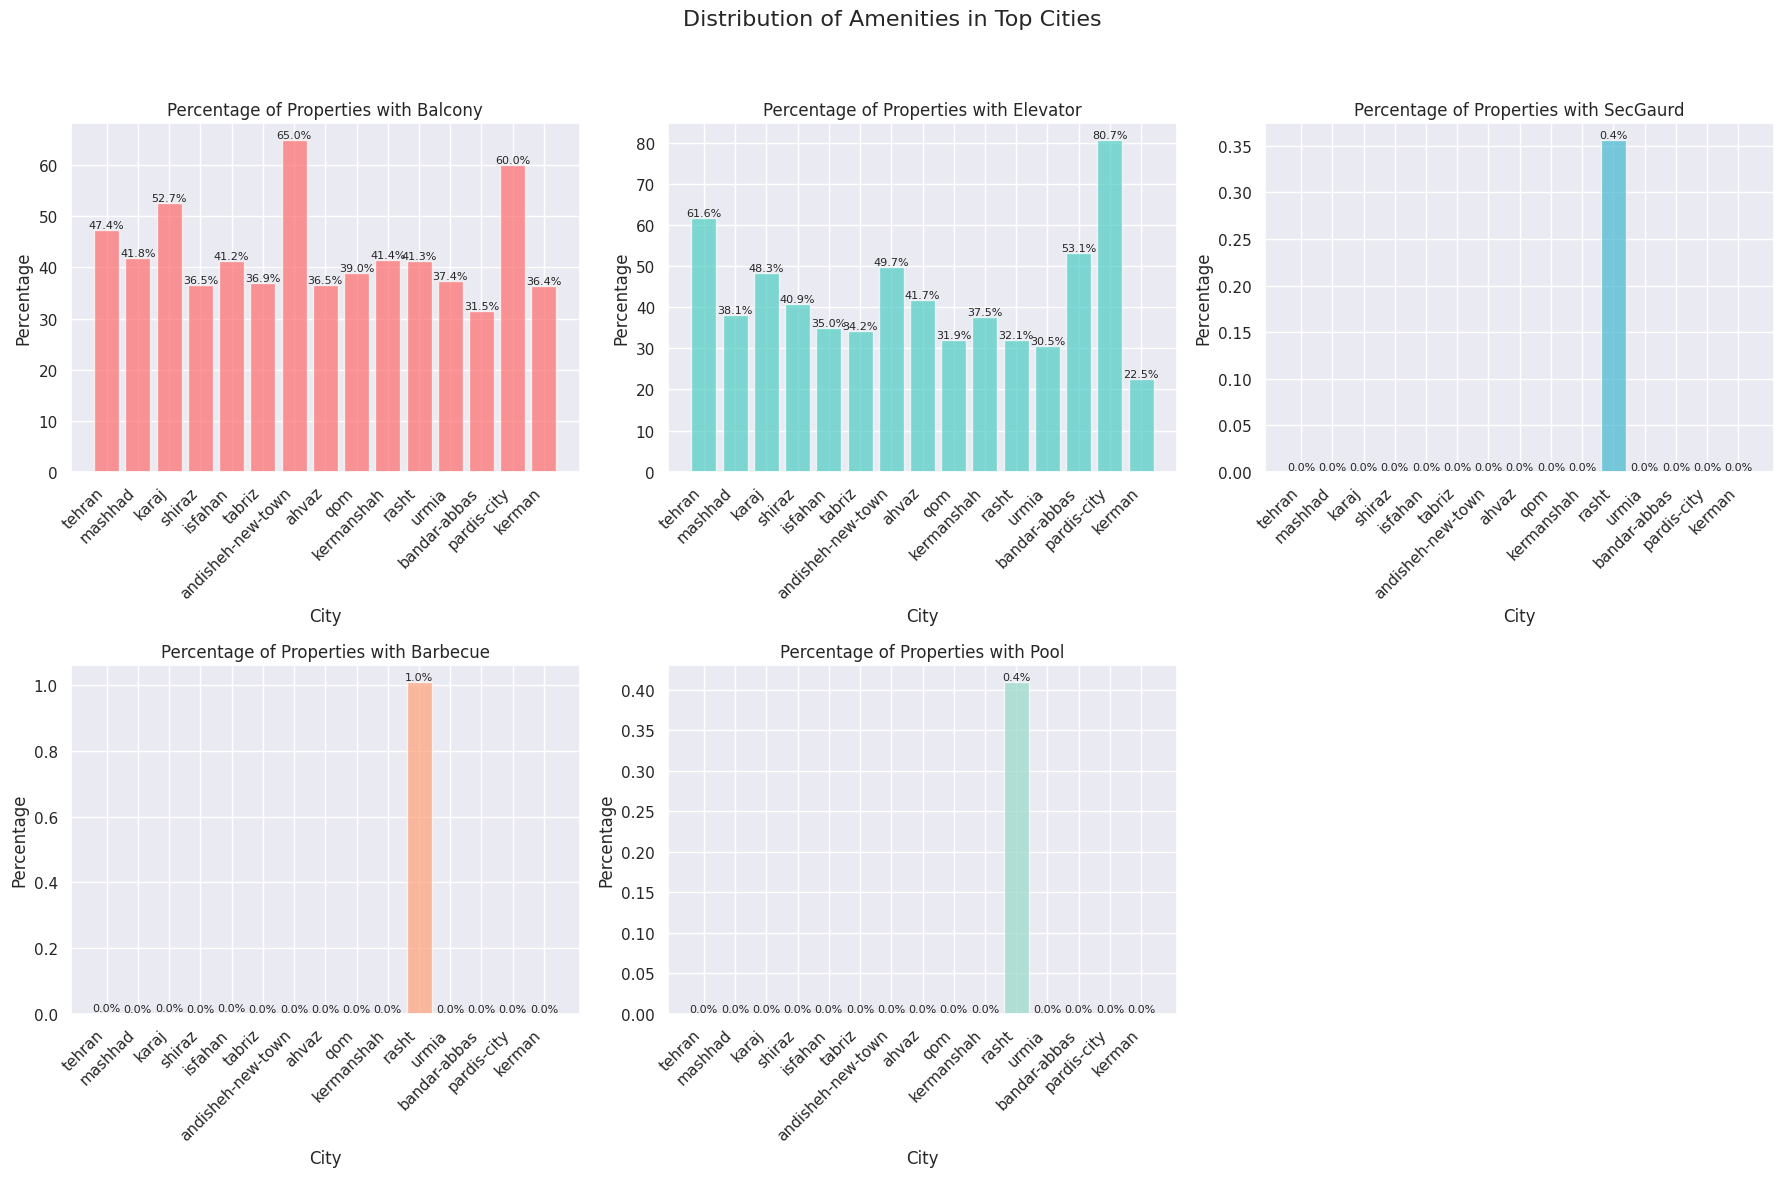

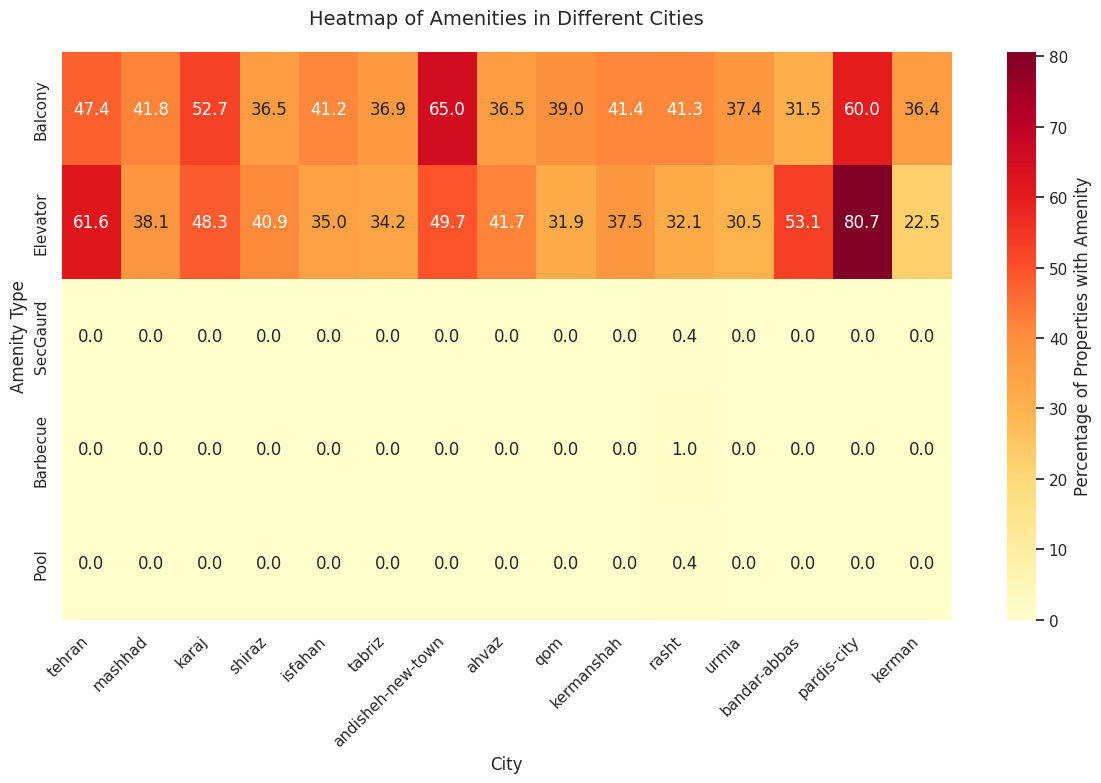

In [47]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


top_cities = city_amenities.head(15).copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Amenities in Top Cities', fontsize=16, y=0.98)

amenity_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for i, (col, name) in enumerate(amenity_names.items()):
    row = i // 3
    col_idx = i % 3
    
    if col in divarDf_amenity.columns:
        ax = axes[row, col_idx]
        bars = ax.bar(range(len(top_cities)), top_cities[f'{col}_pct'], 
                      color=amenity_colors[i], alpha=0.7)
        ax.set_title(f'Percentage of Properties with {name}', fontsize=12)
        ax.set_xlabel('City')
        ax.set_ylabel('Percentage')
        ax.set_xticks(range(len(top_cities)))
        ax.set_xticklabels(top_cities.index, rotation=45, ha='right')
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

axes[1, 2].remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# ---------- Seaborn Heatmap ----------
top_15_cities = city_amenities.head(15)

heatmap_data = []
for col in amenity_cols:
    if col in divarDf_amenity.columns:
        heatmap_data.append(top_15_cities[f'{col}_pct'].values)

amenity_labels = [amenity_names[col] for col in amenity_cols if col in divarDf_amenity.columns]
city_labels = top_15_cities.index.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, 
            xticklabels=city_labels,
            yticklabels=amenity_labels,
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Properties with Amenity'})

plt.title('Heatmap of Amenities in Different Cities', fontsize=14, pad=20)
plt.xlabel('City', fontsize=12)
plt.ylabel('Amenity Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ---------- Plotly Interactive Subplots ----------
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f'Distribution of {name}' for name in amenity_names.values()],
    specs=[[{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}, {"type": "domain"}]]
)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
top_10_cities = city_amenities.head(10)

for i, (col, name) in enumerate(amenity_names.items()):
    row = (i // 3) + 1
    col_idx = (i % 3) + 1
    
    if col in divarDf_amenity.columns and i < 4:  
        fig.add_trace(
            go.Bar(
                x=top_10_cities.index,
                y=top_10_cities[f'{col}_pct'],
                name=name,
                marker_color=colors[i],
                text=[f'{x:.1f}%' for x in top_10_cities[f'{col}_pct']],
                textposition='auto',
            ),
            row=row, col=col_idx
        )


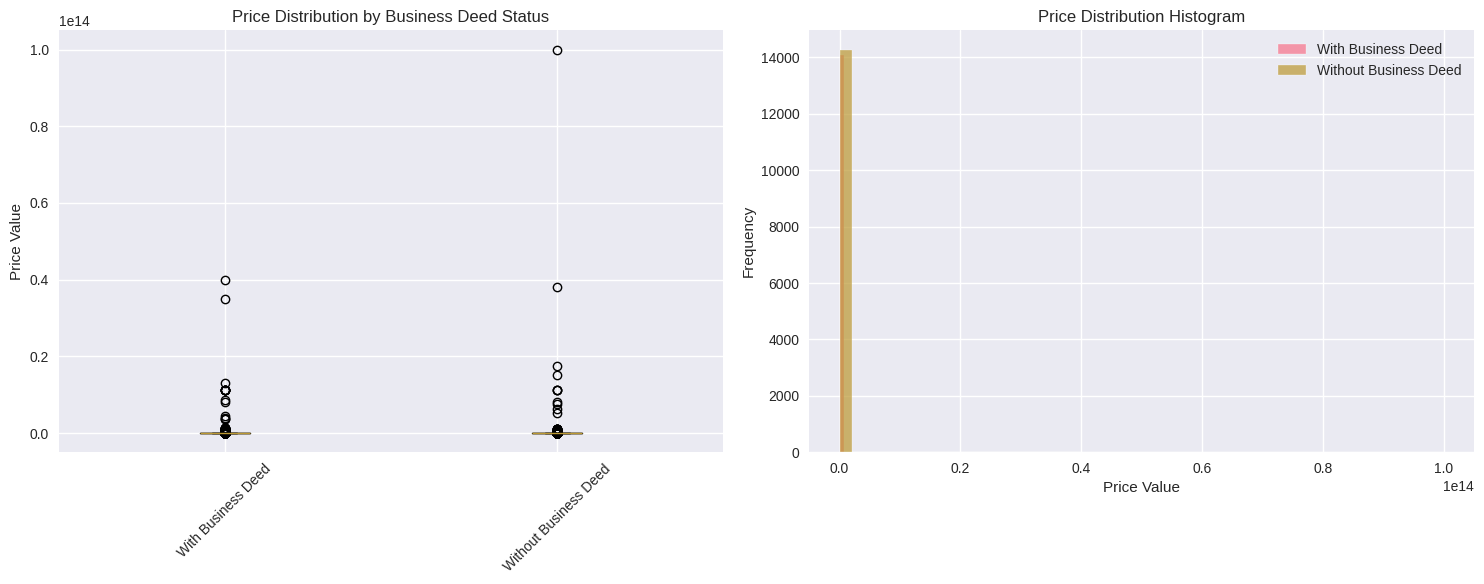


Levene's Test for Equal Variances: Statistic=0.0103, p-value=0.919317

Mann-Whitney U test Results:
Test Statistic: 112196009.5000
P-value: 0.000000
Alpha level: 0.05
Result: REJECT the null hypothesis
Conclusion: There IS a statistically significant difference in average selling prices between properties with and without business deeds.

HYPOTHESIS TEST 2: Impact of Luxury vs Non-Luxury Amenities on Property Prices
Data with price information: 566444 records

Luxury Score Distribution:
luxury_score
0    560191
1      3887
2      1109
3       437
4       820
Name: count, dtype: int64

Non-Luxury Score Distribution:
non_luxury_score
0    566444
Name: count, dtype: int64

--- LUXURY AMENITIES ANALYSIS ---
One-way ANOVA for Luxury Amenities:
Test Statistic: 0.3839
P-value: 0.820295
Result: Luxury amenities do NOT have a significant impact on property prices

--- NON-LUXURY AMENITIES ANALYSIS ---

--- CORRELATION ANALYSIS ---
Correlation Matrix:
                  price_value  luxury_score

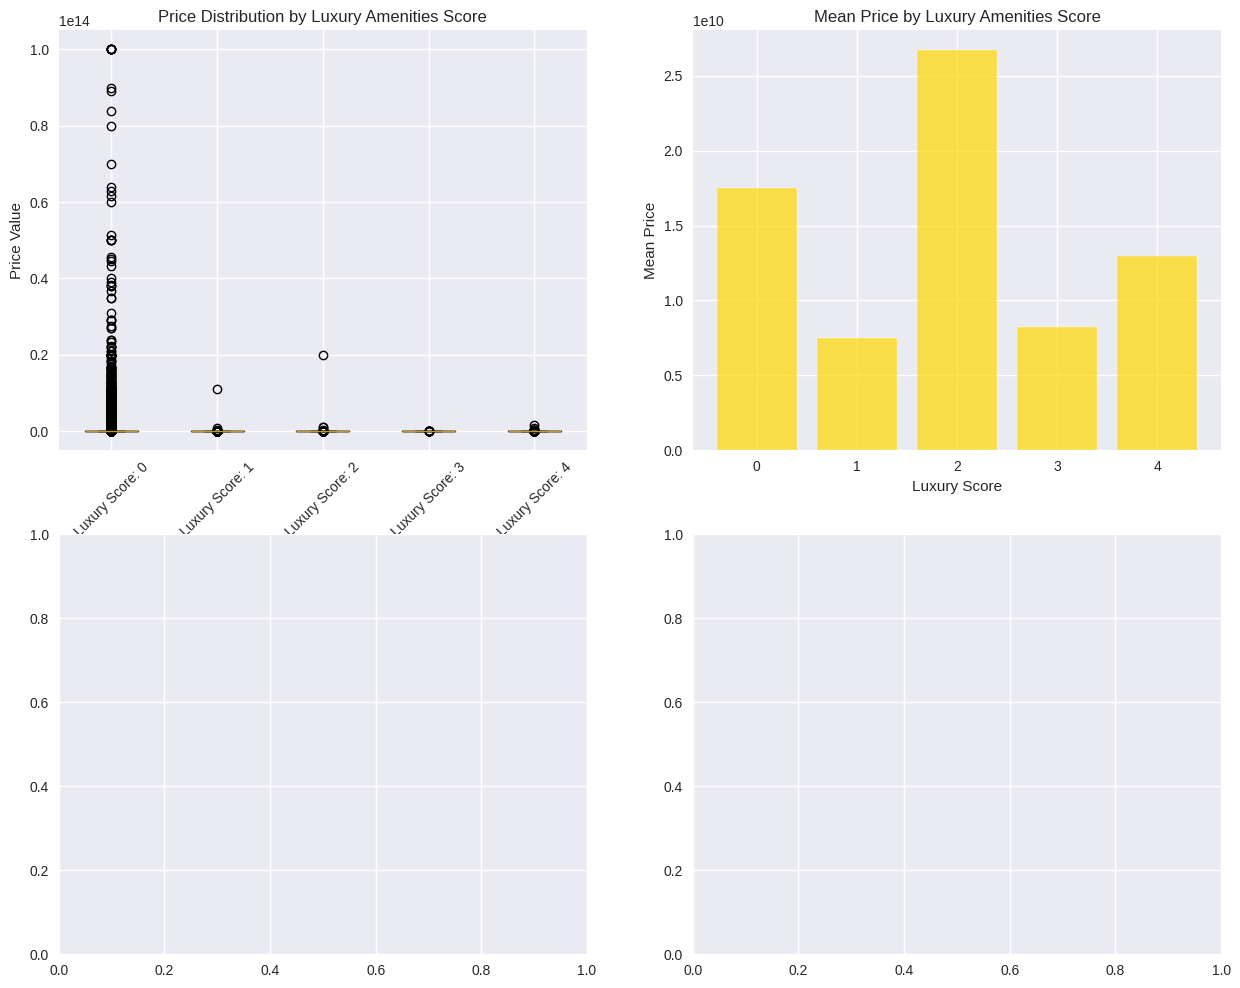

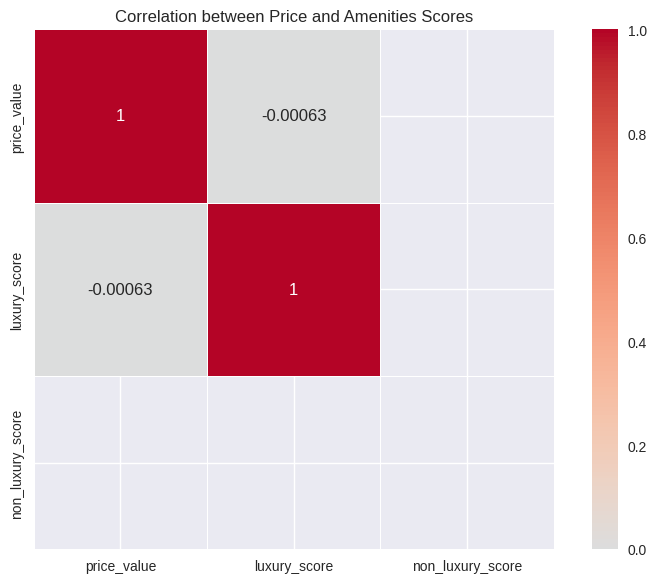


SUMMARY OF FINDINGS

1. BUSINESS DEED IMPACT:
   ✓ Having a business deed SIGNIFICANTLY affects property prices

2. AMENITIES IMPACT:
   ✗ Luxury amenities do NOT significantly affect property prices


In [49]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = divarDf_cleaned.copy()

commercial_data = df[
    (df['price_value'].notna()) & 
    (df['price_value'] > 0) & 
    (df['has_business_deed'].notna())
].copy()

with_deed = commercial_data[commercial_data['has_business_deed'] == True]['price_value']
without_deed = commercial_data[commercial_data['has_business_deed'] == False]['price_value']

if len(with_deed) > 0 and len(without_deed) > 0:
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    data_for_box = [with_deed, without_deed]
    axes[0].boxplot(data_for_box, labels=['With Business Deed', 'Without Business Deed'])
    axes[0].set_title('Price Distribution by Business Deed Status')
    axes[0].set_ylabel('Price Value')
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].hist(with_deed, alpha=0.7, label='With Business Deed', bins=50)
    axes[1].hist(without_deed, alpha=0.7, label='Without Business Deed', bins=50)
    axes[1].set_title('Price Distribution Histogram')
    axes[1].set_xlabel('Price Value')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    sample_size = min(5000, len(with_deed), len(without_deed))
    if len(with_deed) > sample_size:
        with_deed_sample = with_deed.sample(sample_size, random_state=42)
    else:
        with_deed_sample = with_deed
        
    if len(without_deed) > sample_size:
        without_deed_sample = without_deed.sample(sample_size, random_state=42)
    else:
        without_deed_sample = without_deed
    
    stat_with, p_with = stats.shapiro(with_deed_sample)
    stat_without, p_without = stats.shapiro(without_deed_sample)

    stat_levene, p_levene = stats.levene(with_deed, without_deed)
    print(f"\nLevene's Test for Equal Variances: Statistic={stat_levene:.4f}, p-value={p_levene:.6f}")

    if p_with > 0.05 and p_without > 0.05 and p_levene > 0.05:

        stat_test, p_test = stats.ttest_ind(with_deed, without_deed)
        test_name = "Independent t-test"
    else:
        stat_test, p_test = stats.mannwhitneyu(with_deed, without_deed, alternative='two-sided')
        test_name = "Mann-Whitney U test"
    
    print(f"\n{test_name} Results:")
    print(f"Test Statistic: {stat_test:.4f}")
    print(f"P-value: {p_test:.6f}")
    print(f"Alpha level: 0.05")
    
    if p_test < 0.05:
        print("Result: REJECT the null hypothesis")
        print("Conclusion: There IS a statistically significant difference in average selling prices between properties with and without business deeds.")
    else:
        print("Result: FAIL TO REJECT the null hypothesis")
        print("Conclusion: There is NO statistically significant difference in average selling prices between properties with and without business deeds.")
else:
    print("Insufficient data for statistical testing.")

print("\n" + "="*80)
print("HYPOTHESIS TEST 2: Impact of Luxury vs Non-Luxury Amenities on Property Prices")
print("="*80)

# Question 2: Do non-luxury amenities also have a significant impact on average property prices?

luxury_amenities = ['has_pool', 'has_barbecue', 'has_sauna', 'has_jacuzzi']
non_luxury_amenities = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 
                       'has_water', 'has_warm_water_provider', 'has_electricity', 
                       'has_gas', 'has_heating_system', 'has_cooling_system', 
                       'has_restroom', 'has_security_guard']


price_data = df[(df['price_value'].notna()) & (df['price_value'] > 0)].copy()

print(f"Data with price information: {len(price_data)} records")

price_data['luxury_score'] = 0
for amenity in luxury_amenities:
    if amenity in price_data.columns:
        price_data['luxury_score'] += price_data[amenity].fillna(False).astype(int)


price_data['non_luxury_score'] = 0
for amenity in non_luxury_amenities:
    if amenity in price_data.columns:
        price_data[amenity] = price_data[amenity].apply(lambda x: 1 if x is True else 0)

print("\nLuxury Score Distribution:")
print(price_data['luxury_score'].value_counts().sort_index())

print("\nNon-Luxury Score Distribution:")
print(price_data['non_luxury_score'].value_counts().sort_index())


print("\n--- LUXURY AMENITIES ANALYSIS ---")


luxury_groups = []
luxury_labels = []
for score in sorted(price_data['luxury_score'].unique()):
    group_data = price_data[price_data['luxury_score'] == score]['price_value']
    if len(group_data) > 30:  
        luxury_groups.append(group_data)
        luxury_labels.append(f"Luxury Score: {score}")

if len(luxury_groups) >= 2:
 
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    

    axes[0,0].boxplot(luxury_groups, labels=luxury_labels)
    axes[0,0].set_title('Price Distribution by Luxury Amenities Score')
    axes[0,0].set_ylabel('Price Value')
    axes[0,0].tick_params(axis='x', rotation=45)

    luxury_means = [group.mean() for group in luxury_groups]
    axes[0,1].bar(range(len(luxury_means)), luxury_means, color='gold', alpha=0.7)
    axes[0,1].set_title('Mean Price by Luxury Amenities Score')
    axes[0,1].set_xlabel('Luxury Score')
    axes[0,1].set_ylabel('Mean Price')
    axes[0,1].set_xticks(range(len(luxury_labels)))
    axes[0,1].set_xticklabels([label.split(':')[1].strip() for label in luxury_labels])
    
  
    if len(luxury_groups) > 2:
        stat_luxury, p_luxury = stats.f_oneway(*luxury_groups)
        test_name_luxury = "One-way ANOVA"
    else:
        stat_luxury, p_luxury = stats.ttest_ind(luxury_groups[0], luxury_groups[1])
        test_name_luxury = "Independent t-test"
    
    print(f"{test_name_luxury} for Luxury Amenities:")
    print(f"Test Statistic: {stat_luxury:.4f}")
    print(f"P-value: {p_luxury:.6f}")
    
    if p_luxury < 0.05:
        print("Result: Luxury amenities have a SIGNIFICANT impact on property prices")
    else:
        print("Result: Luxury amenities do NOT have a significant impact on property prices")


print("\n--- NON-LUXURY AMENITIES ANALYSIS ---")


non_luxury_groups = []
non_luxury_labels = []
for score in sorted(price_data['non_luxury_score'].unique()):
    group_data = price_data[price_data['non_luxury_score'] == score]['price_value']
    if len(group_data) > 30:  
        non_luxury_groups.append(group_data)
        non_luxury_labels.append(f"Non-Luxury Score: {score}")

if len(non_luxury_groups) >= 2:
 
    axes[1,0].boxplot(non_luxury_groups, labels=non_luxury_labels)
    axes[1,0].set_title('Price Distribution by Non-Luxury Amenities Score')
    axes[1,0].set_ylabel('Price Value')
    axes[1,0].tick_params(axis='x', rotation=45)
   
    non_luxury_means = [group.mean() for group in non_luxury_groups]
    axes[1,1].bar(range(len(non_luxury_means)), non_luxury_means, color='lightblue', alpha=0.7)
    axes[1,1].set_title('Mean Price by Non-Luxury Amenities Score')
    axes[1,1].set_xlabel('Non-Luxury Score')
    axes[1,1].set_ylabel('Mean Price')
    axes[1,1].set_xticks(range(len(non_luxury_labels)))
    axes[1,1].set_xticklabels([label.split(':')[1].strip() for label in non_luxury_labels])
    
    plt.tight_layout()
    plt.show()
    
    if len(non_luxury_groups) > 2:
        stat_non_luxury, p_non_luxury = stats.f_oneway(*non_luxury_groups)
        test_name_non_luxury = "One-way ANOVA"
    else:
        stat_non_luxury, p_non_luxury = stats.ttest_ind(non_luxury_groups[0], non_luxury_groups[1])
        test_name_non_luxury = "Independent t-test"
    
    print(f"{test_name_non_luxury} for Non-Luxury Amenities:")
    print(f"Test Statistic: {stat_non_luxury:.4f}")
    print(f"P-value: {p_non_luxury:.6f}")
    
    if p_non_luxury < 0.05:
        print("Result: Non-luxury amenities have a SIGNIFICANT impact on property prices")
    else:
        print("Result: Non-luxury amenities do NOT have a significant impact on property prices")


print("\n--- CORRELATION ANALYSIS ---")
correlation_data = price_data[['price_value', 'luxury_score', 'non_luxury_score']].corr()
print("Correlation Matrix:")
print(correlation_data)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation between Price and Amenities Scores')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY OF FINDINGS")
print("="*80)

print("\n1. BUSINESS DEED IMPACT:")
if 'p_test' in locals():
    if p_test < 0.05:
        print("   ✓ Having a business deed SIGNIFICANTLY affects property prices")
    else:
        print("   ✗ Having a business deed does NOT significantly affect property prices")
else:
    print("   ! Insufficient data to test business deed impact")

print("\n2. AMENITIES IMPACT:")
if 'p_luxury' in locals():
    if p_luxury < 0.05:
        print("   ✓ Luxury amenities SIGNIFICANTLY affect property prices")
    else:
        print("   ✗ Luxury amenities do NOT significantly affect property prices")

if 'p_non_luxury' in locals():
    if p_non_luxury < 0.05:
        print("   ✓ Non-luxury amenities SIGNIFICANTLY affect property prices")
        print("   → This suggests that basic amenities also add value to properties")
    else:
        print("   ✗ Non-luxury amenities do NOT significantly affect property prices")
        print("   → Only luxury amenities seem to add significant value")